In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('./home-credit-default-risk/application_train.csv')

In [3]:
train.shape

(307511, 122)

In [4]:
missing_data_train = pd.DataFrame({'total_missing': train.isna().sum(), 'perc_missing': (train.isna().sum()/len(train))*100})
pd.set_option('display.max_rows', None)
# missing_data_train['total_missing']>200000

In [5]:
def printNULLatt(df):
    for i in range(len(df)):
        if(df['total_missing'][i]!=0):
            print(df.index[i] + ': ' + str(df['total_missing'][i]))

In [6]:
# checking missing data
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum()/train.isnull().count()*100).sort_values(ascending = False)
missing_application_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_application_train_data.head(10)

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953


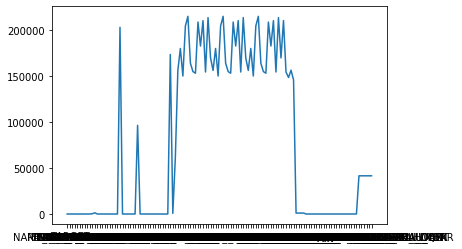

In [7]:
import matplotlib.pyplot as plt
plt.plot(missing_data_train.index,missing_data_train['total_missing'].values.tolist())
plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
# train['NAME_CONTRACT_TYPE'] =  le.fit_transform(train['NAME_CONTRACT_TYPE'].astype('str'))
# train.head()

In [9]:
for i in train:
    if(type(train[i][0])==str):
        train[i] =  le.fit_transform(train[i].astype('str'))

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(57)
memory usage: 286.2 MB


In [11]:
train.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,0,1,0,1,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,0,0,1,1,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,0,1,1,1,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,0,0,0,1,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,1,1,0,1,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
dropcolumn=(missing_application_train_data[(missing_application_train_data['Percent']>50)]).index.array

In [13]:
dropcolumn

<PandasArray>
[         'COMMONAREA_MEDI',           'COMMONAREA_AVG',
          'COMMONAREA_MODE', 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_MEDI',  'NONLIVINGAPARTMENTS_AVG',
       'FONDKAPREMONT_MODE',    'LIVINGAPARTMENTS_MEDI',
    'LIVINGAPARTMENTS_MODE',     'LIVINGAPARTMENTS_AVG',
           'FLOORSMIN_MEDI',           'FLOORSMIN_MODE',
            'FLOORSMIN_AVG',         'YEARS_BUILD_MEDI',
          'YEARS_BUILD_AVG',         'YEARS_BUILD_MODE',
              'OWN_CAR_AGE',            'LANDAREA_MODE',
             'LANDAREA_AVG',            'LANDAREA_MEDI',
        'BASEMENTAREA_MEDI',         'BASEMENTAREA_AVG',
        'BASEMENTAREA_MODE',             'EXT_SOURCE_1',
       'NONLIVINGAREA_MEDI',        'NONLIVINGAREA_AVG',
       'NONLIVINGAREA_MODE',           'ELEVATORS_MODE',
            'ELEVATORS_AVG',           'ELEVATORS_MEDI',
       'WALLSMATERIAL_MODE',          'APARTMENTS_MODE',
           'APARTMENTS_AVG',          'APARTMENTS_MEDI',
           'ENTRA

In [14]:
dropcol=[]
for i in range(len(dropcolumn)):
    dropcol.append(dropcolumn[i])

In [15]:
train.drop(dropcol,axis=1,inplace=True)

In [16]:
train= train[~(train.isnull().any(axis=1))]

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123442 entries, 0 to 307510
Data columns (total 81 columns):
SK_ID_CURR                      123442 non-null int64
TARGET                          123442 non-null int64
NAME_CONTRACT_TYPE              123442 non-null int64
CODE_GENDER                     123442 non-null int64
FLAG_OWN_CAR                    123442 non-null int64
FLAG_OWN_REALTY                 123442 non-null int64
CNT_CHILDREN                    123442 non-null int64
AMT_INCOME_TOTAL                123442 non-null float64
AMT_CREDIT                      123442 non-null float64
AMT_ANNUITY                     123442 non-null float64
AMT_GOODS_PRICE                 123442 non-null float64
NAME_TYPE_SUITE                 123442 non-null int64
NAME_INCOME_TYPE                123442 non-null int64
NAME_EDUCATION_TYPE             123442 non-null int64
NAME_FAMILY_STATUS              123442 non-null int64
NAME_HOUSING_TYPE               123442 non-null int64
REGION_POPULATION

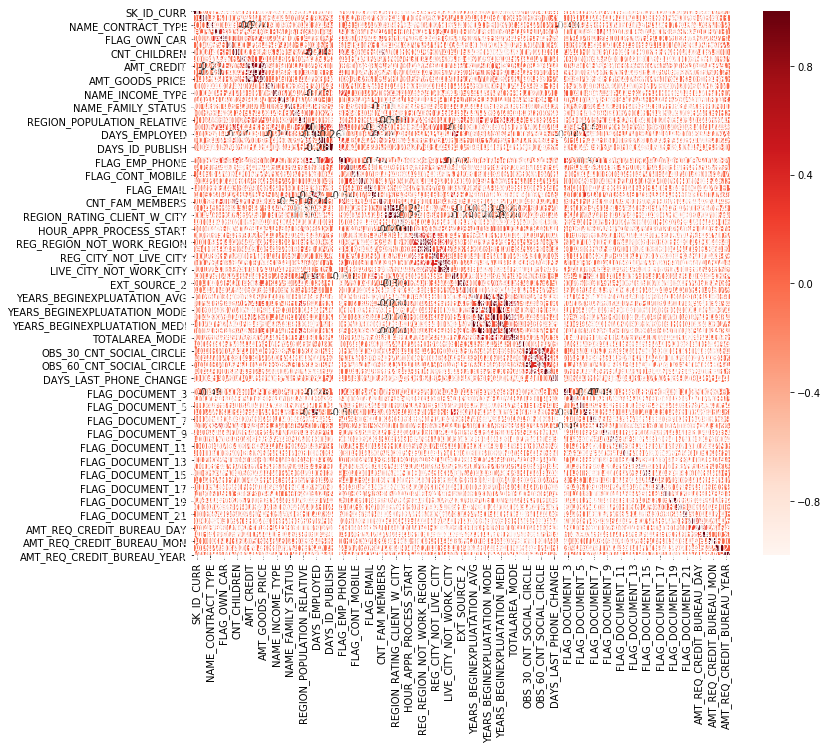

In [18]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
# cor = df.corr()
sns.heatmap(train.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

In [19]:
#Correlation with output variable
cor_target = abs(train.corr()['TARGET'])#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

TARGET          1.000000
EXT_SOURCE_2    0.141163
EXT_SOURCE_3    0.167817
Name: TARGET, dtype: float64

In [20]:
from sklearn.preprocessing import StandardScaler

features = train.columns[2:]
features

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINE

In [21]:
predictor=[]
for i in range(len(features)):
    predictor.append(features[i])

In [22]:
X = train.loc[:,predictor].values
X

array([[0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 2., 0., 1.]])

In [23]:
Y = train.loc[:,['TARGET']].values
Y

array([[1],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [24]:
X = StandardScaler().fit_transform(X)
X

array([[-0.326112  ,  1.44130375, -0.70919146, ..., -0.30271873,
        -0.43092776, -0.47435312],
       [-0.326112  , -0.69366256, -0.70919146, ...,  0.62418703,
        -0.43092776, -1.00919568],
       [-0.326112  ,  1.44130375,  1.41005646, ..., -0.30271873,
        -0.43092776, -0.47435312],
       ...,
       [-0.326112  , -0.69366256, -0.70919146, ...,  0.62418703,
        -0.43092776, -0.47435312],
       [-0.326112  , -0.69366256, -0.70919146, ..., -0.30271873,
        -0.43092776, -1.00919568],
       [-0.326112  , -0.69366256, -0.70919146, ...,  1.5510928 ,
        -0.43092776, -0.47435312]])

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, 
                           columns=['Component 1','Component 2',
                                   'Component 3','Component 4',
                                   'Component 5','Component 6',
                                   'Component 7','Component 8',
                                   'Component 9','Component 10'])

In [26]:
finalDf = pd.concat([principalDf, train['TARGET']], axis = 1)
finalDf.head()

,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9,Component 10,TARGET
0,-0.322906,2.873964,-0.806140,1.428288,0.238659,4.139319,-1.867657,-0.019520,1.742404,0.063212,1.0
1,0.410273,1.576842,-0.960010,-1.003473,1.552502,-0.624561,-1.700895,-0.817945,-0.878154,-1.657456,NaN
2,1.692192,-0.239943,-0.602186,0.957268,0.569785,-1.256135,1.229144,0.432365,-0.002640,-0.646454,NaN
3,-0.896403,0.599845,-0.253378,-1.234824,0.902540,3.077468,-3.259405,-3.312459,0.923560,0.845948,NaN
4,0.115236,2.211988,-1.042950,0.506363,0.474110,-1.241026,0.372312,1.011603,-0.674941,-0.378704,NaN


In [29]:
finalDf.replace(np.NAN,0,inplace=True)
finalDf.head()

,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9,Component 10,TARGET
0,-0.322906,2.873964,-0.806140,1.428288,0.238659,4.139319,-1.867657,-0.019520,1.742404,0.063212,1.0
1,0.410273,1.576842,-0.960010,-1.003473,1.552502,-0.624561,-1.700895,-0.817945,-0.878154,-1.657456,0.0
2,1.692192,-0.239943,-0.602186,0.957268,0.569785,-1.256135,1.229144,0.432365,-0.002640,-0.646454,0.0
3,-0.896403,0.599845,-0.253378,-1.234824,0.902540,3.077468,-3.259405,-3.312459,0.923560,0.845948,0.0
4,0.115236,2.211988,-1.042950,0.506363,0.474110,-1.241026,0.372312,1.011603,-0.674941,-0.378704,0.0


In [33]:
finalDf['TARGET'] = finalDf['TARGET'].astype('int')
finalDf.head()

,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9,Component 10,TARGET
0,-0.322906,2.873964,-0.806140,1.428288,0.238659,4.139319,-1.867657,-0.019520,1.742404,0.063212,1
1,0.410273,1.576842,-0.960010,-1.003473,1.552502,-0.624561,-1.700895,-0.817945,-0.878154,-1.657456,0
2,1.692192,-0.239943,-0.602186,0.957268,0.569785,-1.256135,1.229144,0.432365,-0.002640,-0.646454,0
3,-0.896403,0.599845,-0.253378,-1.234824,0.902540,3.077468,-3.259405,-3.312459,0.923560,0.845948,0
4,0.115236,2.211988,-1.042950,0.506363,0.474110,-1.241026,0.372312,1.011603,-0.674941,-0.378704,0


In [35]:
predictor = ['Component 1','Component 2',
              'Component 3','Component 4',
              'Component 5','Component 6',
              'Component 7','Component 8',
              'Component 9','Component 10']
X = finalDf.loc[:,predictor].values
Y = finalDf.loc[:,['TARGET']].values

In [38]:
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=27)

In [42]:
SVC_model = SVC()
# KNN model requires you to specify n_neighbors,
# the number of points the classifier will look at to determine what class a new point belongs to
KNN_model = KNeighborsClassifier(n_neighbors=5)

In [ ]:
SVC_model.fit(X_train, y_train)
KNN_model.fit(X_train, y_train)

/home/muhdlaziem/Workspace/PYenv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/muhdlaziem/Workspace/PYenv/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
SVC_prediction = SVC_model.predict(X_test)
KNN_prediction = KNN_model.predict(X_test)

In [ ]:
# Accuracy score is the simplest way to evaluate
print(accuracy_score(SVC_prediction, y_test))
print(accuracy_score(KNN_prediction, y_test))
# But Confusion Matrix and Classification Report give more details about performance
print(confusion_matrix(SVC_prediction, y_test))
print(classification_report(KNN_prediction, y_test))